In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


In [16]:
import tensorflow as tf
print(tf.__version__)


2.13.1


In [17]:
# Load the dataset
file_path = r"dataset.csv"
data = pd.read_csv(file_path, header=None)

In [18]:
# Separate features (landmarks) and labels
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column contains labels

# Convert labels to categorical (one-hot encoding)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

print(f"Shape of features: {X.shape}")
print(f"Shape of labels: {y_categorical.shape}")
print(f"Classes: {label_encoder.classes_}")


Shape of features: (5500, 63)
Shape of labels: (5500, 5)
Classes: ['OK' 'PALM_IN' 'PALM_OUT' 'THUMBS_DOWN' 'THUMB_UP']


In [19]:
# Normalizing the X values (landmarks)
X = X / np.max(X)  # Scale all values between 0 and 1


In [20]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (4400, 63), Testing data shape: (1100, 63)


In [21]:

# Define the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape explicitly here
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Number of output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               8192      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 16773 (65.52 KB)
Trainable params: 16773 (65.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32
)


Epoch 1/30
138/138 [==============================] - 1s 2ms/step - loss: 1.3444 - accuracy: 0.4711 - val_loss: 0.8208 - val_accuracy: 0.8909
Epoch 2/30
138/138 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.8680 - val_loss: 0.2397 - val_accuracy: 0.9655
Epoch 3/30
138/138 [==============================] - 0s 1ms/step - loss: 0.2469 - accuracy: 0.9364 - val_loss: 0.1076 - val_accuracy: 0.9809
Epoch 4/30
138/138 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9670 - val_loss: 0.0751 - val_accuracy: 0.9836
Epoch 5/30
138/138 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.9716 - val_loss: 0.0458 - val_accuracy: 0.9900
Epoch 6/30
138/138 [==============================] - 0s 1ms/step - loss: 0.0866 - accuracy: 0.9786 - val_loss: 0.0364 - val_accuracy: 0.9900
Epoch 7/30
138/138 [==============================] - 0s 1ms/step - loss: 0.0790 - accuracy: 0.9807 - val_loss: 0.0341 - val_accuracy: 0.9900
Epoch 

In [23]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

35/35 [==============================] - 0s 786us/step - loss: 0.0240 - accuracy: 0.9936
Test Accuracy: 99.36%


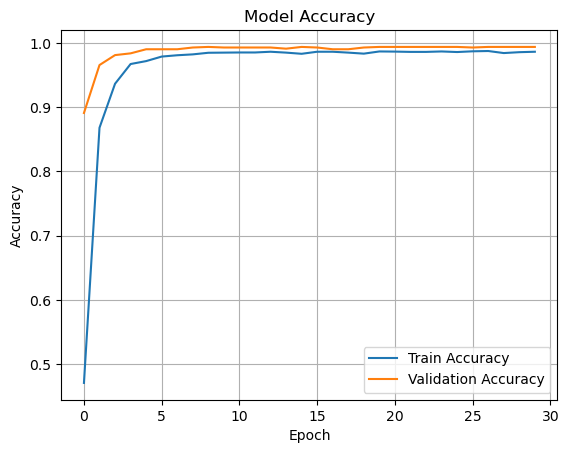

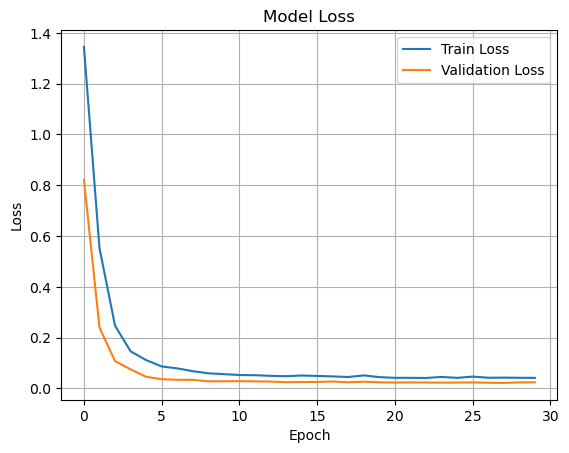

In [24]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




35/35 [==============================] - 0s 634us/step


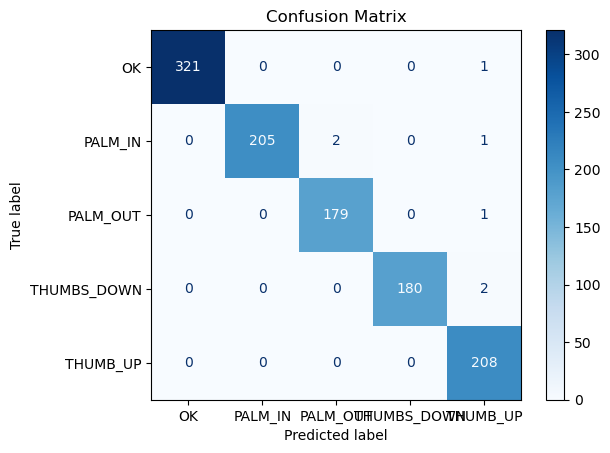

In [25]:


# Predict labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [26]:
# Save the final model
model.save("final_gesture_action_model.h5")
print("Model saved as 'final_gesture_action_model.h5'")

Model saved as 'final_gesture_action_model.h5'


/opt/anaconda3/envs/ocv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# Save in .tf (TensorFlow recommended)
model.save("final_gesture_action_model", save_format="tf")
print("Model saved as 'final_gesture_action_model.tf'")

INFO:tensorflow:Assets written to: final_gesture_action_model/assets


INFO:tensorflow:Assets written to: final_gesture_action_model/assets


Model saved as 'final_gesture_action_model.tf'
